# USA Real Estate exploratory analysis

## Data loading and description

In [1]:
import pandas as pd

data = pd.read_csv('realtor-data.zip.csv')
data.shape
data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


Будем работать со следующими признаками:

* bed - количество спален
* bath - количество санузлов
* house_size - площадь в квадратных футах
* acre_lot - размер придомовой территории
* city - город
* state - штат

Будем предсказывать цену. Таргет находится в колонке price

In [2]:
data.drop(['status', 'zip_code', 'prev_sold_date'], inplace=True, axis=1)
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [3]:
data.shape

(207444, 7)

In [4]:
data.describe()

,bed,bath,acre_lot,house_size,price
count,207444.000000,207444.000000,207444.000000,2.074440e+05,2.074440e+05
mean,3.585551,2.714140,19.369878,2.301219e+03,5.867113e+05
std,1.421687,1.478461,995.496785,5.128018e+03,4.863291e+06
min,1.000000,1.000000,0.000000,1.000000e+02,1.000000e+00
25%,3.000000,2.000000,0.140000,1.404000e+03,2.300000e+05
50%,3.000000,2.000000,0.280000,1.913000e+03,3.650000e+05
75%,4.000000,3.000000,0.750000,2.670000e+03,5.969912e+05
max,99.000000,198.000000,100000.000000,1.560780e+06,2.147484e+09


## Closer examination

In [35]:
states = data.state.unique()
print(f'There are {len(states)} states represented.')
for state in states:
    cities = data[data.state == state].city.unique()
    print(f'In {state}, there are {len(cities)} represented: {", ".join(cities)}')

There are 29 states represented.
In Puerto Rico, there are 86 represented: Adjuntas, Juana Diaz, Ponce, San Sebastian, Ciales, Las Marias, Isabela, Lares, Utuado, Yauco, Mayaguez, Anasco, Moca, Coamo, Guayanilla, Manati, Villalba, Santa Isabel, Penuelas, Aguada, Aguadilla, Maricao, Hormigueros, Guanica, Cabo Rojo, San German, Rincon, Lajas, Arecibo, Hatillo, Morovis, Barceloneta, Vega Baja, Caguas, Camuy, Quebradillas, Dorado, Toa Baja, Toa Alta, Vega Alta, Corozal, Naranjito, Carolina, Sabana Grande, Canovanas, Jayuya, Trujillo Alto, Juncos, Orocovis, Barranquitas, Fajardo, Florida, Comerio, Aibonito, Sabana Hoyos, Catano, San Juan, Guaynabo, Guayama, Gurabo, Aguas Buenas, San Lorenzo, Bayamon, Cayey, Cidra, Arroyo, Patillas, Loiza, Maunabo, Humacao, Yabucoa, Naguabo, Las Piedras, Salinas, Bayamón, Old San Juan, Rio Grande, Santurce, Ceiba, Luquillo, Vieques, Culebra, Isla Verde, Hato Rey, Condado, Rio Piedras
In Virgin Islands, there are 5 represented: Saint Thomas, Saint John, Chris

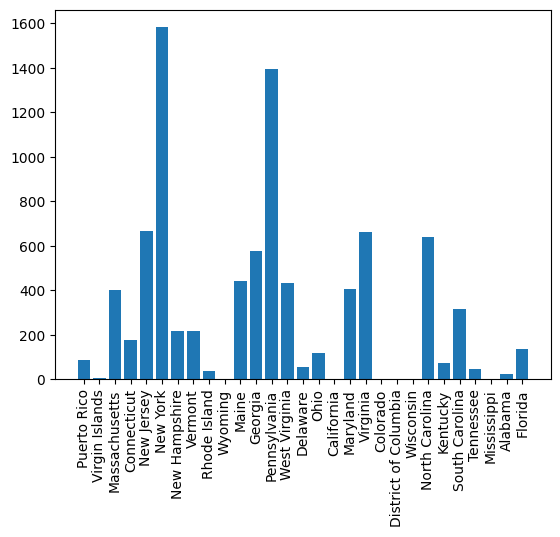

In [49]:
from matplotlib import pyplot as plt

plt.bar(x=data.state.unique(), height=[len(data[data.state == state].city.unique()) for state in data.state.unique()])
plt.xticks(rotation='vertical')
plt.show()

Штаты представлены неравномерно

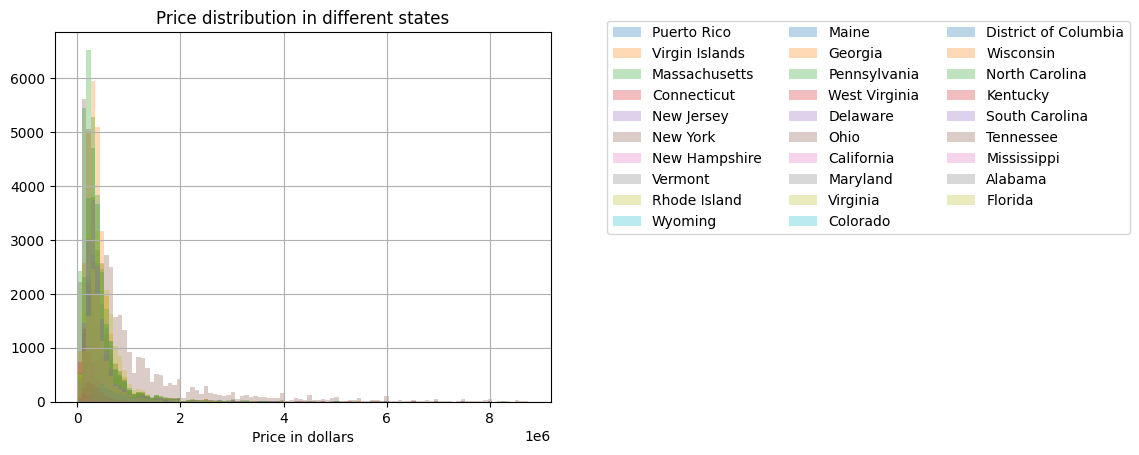

In [84]:
for state in states:
    ax = data[data.state == state].price.hist(bins=100, range=(0, 8750000), legend=True, alpha=0.3), 
plt.legend(states, ncol=3, bbox_to_anchor=(1.1, 1.05))
plt.title('Price distribution in different states')
plt.xlabel('Price in dollars')
plt.show()

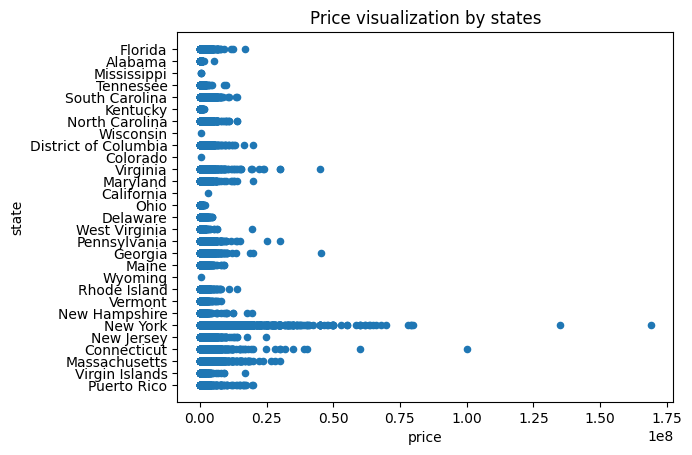

In [103]:
data.plot(kind='scatter', x='price', y='state')
plt.title('Price visualization by states')
plt.show()

Самым дорогим городом оказывается Нью-Йорк, при этом у нас есть два выброса. 

In [100]:
data[data.state == 'New York'].price.max()
data[data.price == data[data.state == 'New York'].price.max()]

data[data.state == 'California'].price.max()
data[data.price == data[data.state == 'California'].price.max()]

data.drop([
    data[data.price == data[data.state == 'New York'].price.max()].index.values[0],
    data[data.price == data[data.state == 'California'].price.max()].index.values[0]
], 
axis=0,
inplace=True)

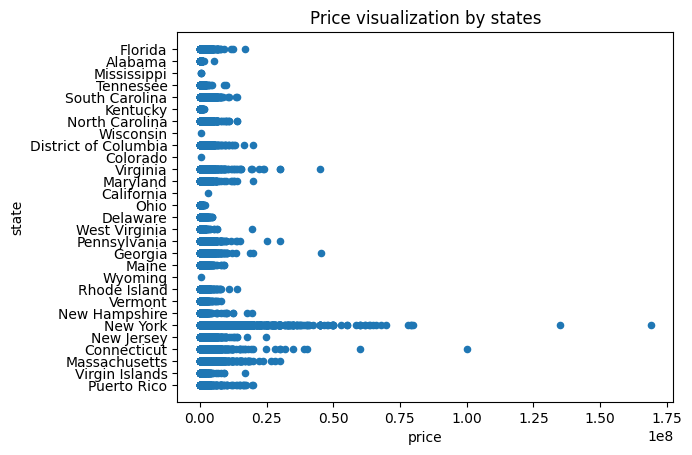

In [104]:
data.plot(kind='scatter', x='price', y='state')
plt.title('Price visualization by states')
plt.show()

Сохраним обработанные данные.

In [14]:
data.to_csv('usa_real_estate.csv', index=False)

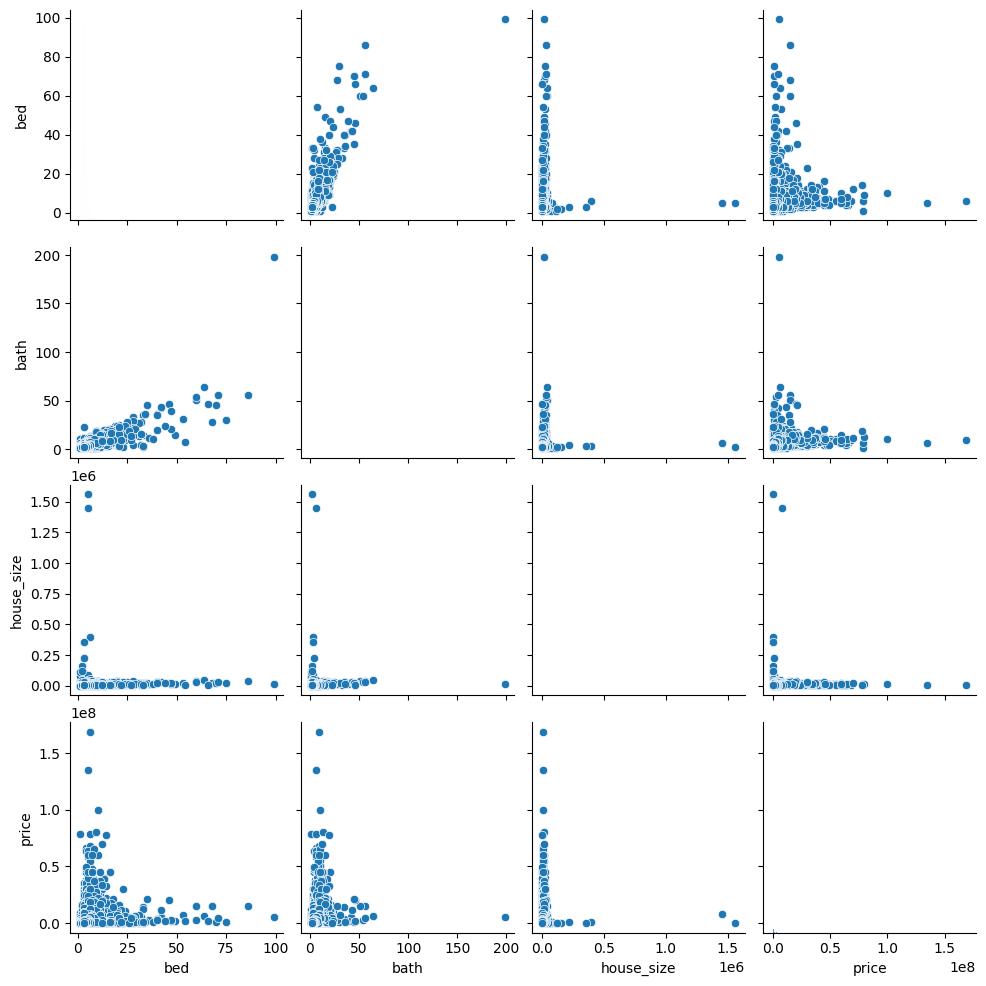

In [107]:
import seaborn as sns

sns.pairplot(data);

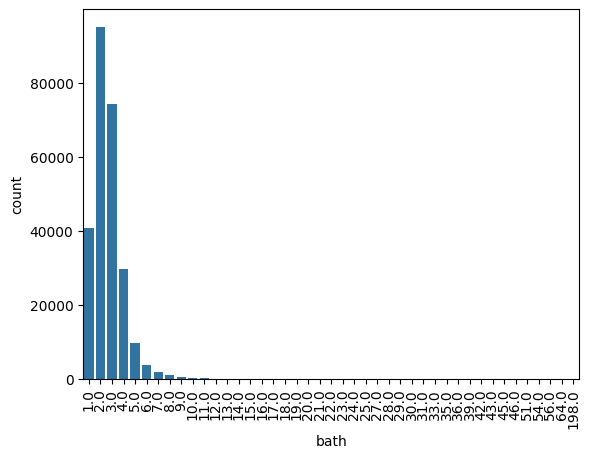

In [108]:
sns.countplot(data=data, x="bath")
plt.xticks(rotation=90);

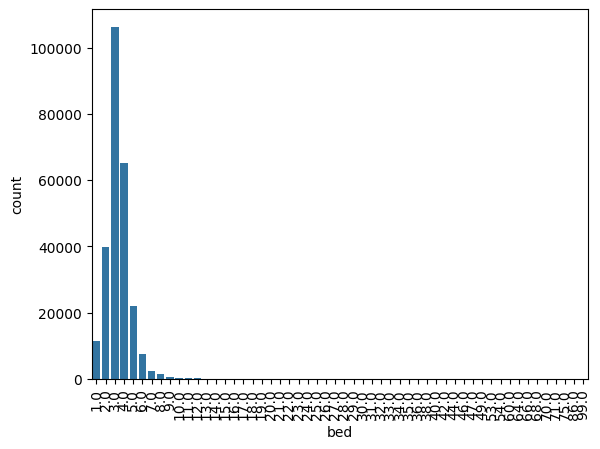

In [109]:
sns.countplot(data=data, x="bed")
plt.xticks(rotation=90);

 Видим, что количество спален, санузлов и метраж являются хорошими предикторами, так как повторяют форму распределения цены.

In [6]:
data.head()

,bed,bath,acre_lot,city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000.0
5,4.0,3.0,0.46,San Sebastian,Puerto Rico,2520.0,179000.0


In [7]:
data.head()

,bed,bath,acre_lot,city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000.0
5,4.0,3.0,0.46,San Sebastian,Puerto Rico,2520.0,179000.0


In [8]:
data.columns

Index(['bed', 'bath', 'acre_lot', 'city', 'state', 'house_size', 'price'], dtype='object')

In [5]:
onehot = pd.get_dummies(data, columns=['city', 'state'], dtype=float, sparse=True)


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

def split_and_scale(data: pd.DataFrame, test_size: float = 0.2) -> np.array:
    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=test_size)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_and_scale(onehot)

/home/marina/Desktop/HSE/trbd/usa_real_estate_hadoop_spark/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:872: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/marina/Desktop/HSE/trbd/usa_real_estate_hadoop_spark/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:872: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/marina/Desktop/HSE/trbd/usa_real_estate_hadoop_spark/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:872: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [7]:
X_train.shape

(165955, 6748)

In [8]:
X_test.shape

(41489, 6748)

In [9]:
from sklearn.ensemble import RandomForestRegressor


class Predictor:

    def __init__(self):
        self.model = RandomForestRegressor(**{'max_depth': 5, 'n_estimators': 4})

    def fit(self, x: np.array, y: np.array):
        self.model.fit(x, y)

    def predict(self, x: np.array) -> float:
        return self.model.predict(x)
    

model = Predictor()
model.fit(x=X_train, y=y_train)

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_pred)

0.003773679082895831